In [2]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from sklearn_evaluation import plot
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json

In [8]:
with open('./result/test/model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('./result/test/weights-42-0.90.hdf5')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 96, 96)        1600      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 48, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 48, 96)       102400    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 24, 96)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 24, 96)       409600    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 2, 96)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4032)              0         
__________

In [6]:
def make_cv_folds(X, y, folds, fold_num):
    X_train = []
    y_train = []
    X_valid = []
    y_valid = []

    for index, fold in enumerate(folds):
        if fold == fold_num:
            X_valid.append(X[index])
            y_valid.append(y[index])
        else:
            X_train.append(X[index])
            y_train.append(y[index])
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_valid = np.array(X_valid)
    y_valid = np.array(y_valid)


    return X_train, y_train, X_valid, y_valid

In [11]:
# Data loading
dataset_path = 'save_data/npy_files'
result_path = 'result/'
X = np.load(os.path.join(dataset_path,'X.npy'))
y = np.load(os.path.join(dataset_path,'y.npy'))
folds = np.load(os.path.join(dataset_path,'folds.npy'))

# rescale [0,255] -> [0,2]    
X = X.astype('float32')/255*2


val_fold = 0
X_train, y_train, X_valid, y_valid = make_cv_folds(X, y, folds, val_fold)

In [15]:
y_prob = model.predict(X_valid)
y_classes = y_prob.argmax(axis=-1)

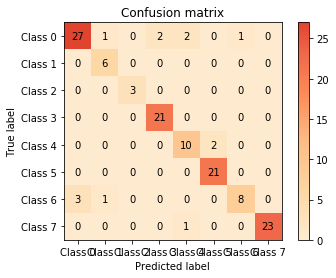

In [19]:
plot.confusion_matrix(y_valid, y_classes)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_valid, y_classes))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86        33
          1       0.75      1.00      0.86         6
          2       1.00      1.00      1.00         3
          3       0.91      1.00      0.95        21
          4       0.77      0.83      0.80        12
          5       0.91      1.00      0.95        21
          6       0.89      0.67      0.76        12
          7       1.00      0.96      0.98        24

avg / total       0.90      0.90      0.90       132

